## $Regresión$ $Lineal$ $Simple$

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal.


$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$

donde:

- $( y_i $): valor observado de la variable dependiente.  
- $( x_i $): valor de la variable independiente.  
- $( \beta_0 $): intercepto o término independiente.  
- $( \beta_1 $): pendiente o coeficiente de regresión.  
- $( \varepsilon_i $): término de error (diferencia entre el valor real y el estimado).



####  Objetivo del modelo

El objetivo es **estimar los parámetros** $( \beta_0 $) y $( \beta_1 $) que minimicen la suma de los errores cuadráticos (Método de **Mínimos Cuadrados Ordinarios**):

$
\text{Minimizar: } S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$

donde:

$
\hat{y_i} = \beta_0 + \beta_1 x_i
$



#### Estimación de los parámetros

**Pendiente ($( \beta_1 $)):**

$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$

**Intercepto ($( \beta_0 $)):**

$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$

donde:
- $( \bar{x} $): media de los valores de $( x $)
- $( \bar{y} $): media de los valores de $( y $)



####  Predicción del modelo

El modelo ajustado permite predecir valores de $( y $) a partir de un valor dado de $( x $):

$
\hat{y} = \beta_0 + \beta_1 x
$


#### Coeficiente de Correlación de Pearson $(r)$

El **coeficiente de correlación de Pearson** mide el **grado de relación lineal** entre dos variables cuantitativas $( x $) y $( y $).  
Su valor siempre está en el rango:

$
-1 \leq r \leq 1
$

donde:

- $( r = 1 $): correlación positiva perfecta.  
- $( r = -1 $): correlación negativa perfecta.  
- $( r = 0 $): no hay correlación lineal.



######  Fórmula

$
r = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }
{ \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } }
$

donde:

- $( x_i, y_i $): valores observados de las variables.  
- $( \bar{x}, \bar{y} $): medias de $( x $) y $( y $).  
- $( n $): número de observaciones.


####  Medida de ajuste del modelo

El **coeficiente de determinación** $( R^2 $) mide qué proporción de la variabilidad de $( y $) es explicada por el modelo:

$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$

- $( R^2 $) cercano a 1 → excelente ajuste.  
- $( R^2 $) cercano a 0 → el modelo explica poco la variabilidad.


El coeficiente de **determinacion** es igual al coeficiente de **correlación** al cuadrado:
- $R^2$ = $r^2$


#### Error Cuadrático Medio (RMSE)

El **Error Cuadrático Medio de la Raíz** (*Root Mean Squared Error*, RMSE) es una métrica utilizada para medir la **precisión de un modelo de regresión**.  
Indica qué tan lejos, en promedio, están las predicciones del modelo respecto a los valores reales.

$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
$

donde:

- $( y_i $): valor real observado.  
- $( \hat{y_i} $): valor predicho por el modelo.  
- $( n $): número total de observaciones.  

Cuanto **menor sea el RMSE**, mejor es el ajuste del modelo (menor error promedio).






####  Supuestos del modelo

1. **Linealidad:** la relación entre $( x $) y $( y $) es lineal.  
2. **Media cero:** los errores tienen media $( E(\varepsilon_i) = 0 $).  
3. **Homocedasticidad:** los errores tienen varianza constante.  
4. **Independencia:** los errores son independientes entre sí.  
5. **Normalidad:** los errores siguen una distribución normal.

### Implementación en Python

Importamos Libreías :

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   


Obetenemos los datos:

In [53]:
df = pd.read_excel("Orange_Dataset.xlsx")
print(df.head(10))

   Tree   age  circumference
0     1   118             30
1     1   484             58
2     1   664             87
3     1  1004            115
4     1  1231            120
5     1  1372            142
6     1  1582            145
7     2   118             33
8     2   484             69
9     2   664            111


Estadística Descriptiva : 

In [54]:
df.describe()   

,Tree,age,circumference
count,35.00000,35.000000,35.000000
mean,3.00000,922.142857,115.857143
std,1.43486,491.864528,57.488179
min,1.00000,118.000000,30.000000
25%,2.00000,484.000000,65.500000
50%,3.00000,1004.000000,115.000000
75%,4.00000,1372.000000,161.500000
max,5.00000,1582.000000,214.000000


Correlación del DataFrame: 

In [55]:
df.corr()

,Tree,age,circumference
Tree,1.000000e+00,-2.179385e-16,0.067746
age,-2.179385e-16,1.000000e+00,0.913519
circumference,6.774645e-02,9.135189e-01,1.000000


Visualización de las correlaciones en un mapa de calor

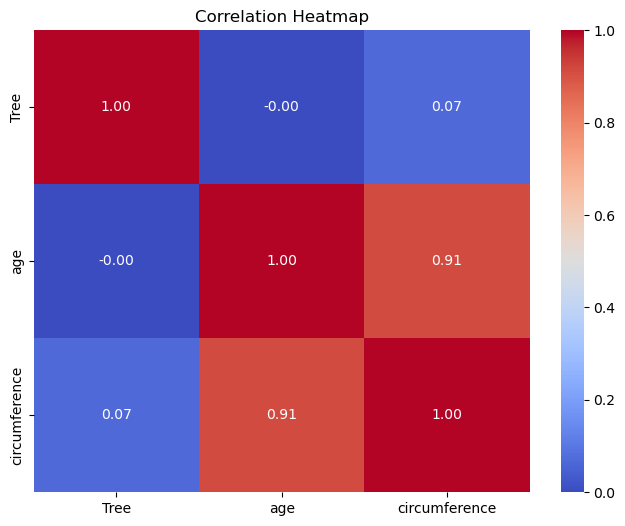

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

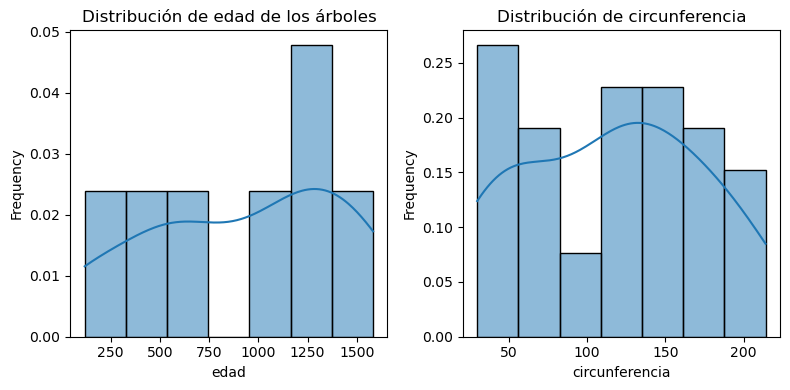

In [62]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
sns.histplot(df["age"], kde=True, stat='frequency')  
plt.title('Distribución de edad de los árboles')
plt.xlabel('edad')

plt.subplot(1,2,2)
sns.histplot(df["circumference"], kde=True, stat='frequency')
plt.title("Distribución de circunferencia")
plt.xlabel('circunferencia')

plt.tight_layout()
plt.show()

Agrupamos los datos con lo cuales trabajaremos:

In [63]:
x_datos= df["age"]
y_datos=df["circumference"]
df = pd.DataFrame({'x_datos': x_datos, 'y_datos': y_datos})
print(df.head(10))


   x_datos  y_datos
0      118       30
1      484       58
2      664       87
3     1004      115
4     1231      120
5     1372      142
6     1582      145
7      118       33
8      484       69
9      664      111


Gráfica de dispersión :

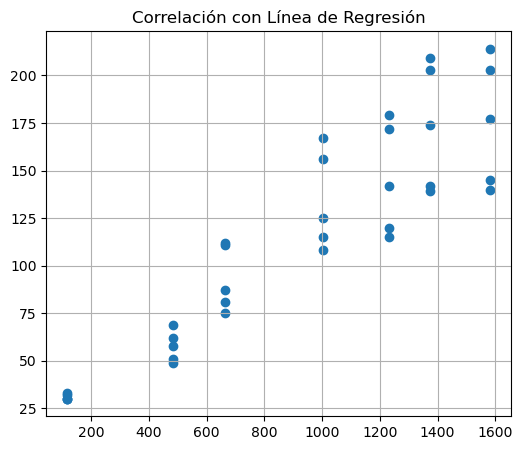

In [51]:
plt.figure(figsize=(6, 5))
plt.scatter(data=df, x='x_datos', y='y_datos',)
plt.title('Correlación con Línea de Regresión')
plt.grid(True)
plt.show()

Modelo de Regresión Lineal:

Intercepto (β0): 17.40
Coeficiente (β1): 0.11
MSE: 531.28
R²: 0.83


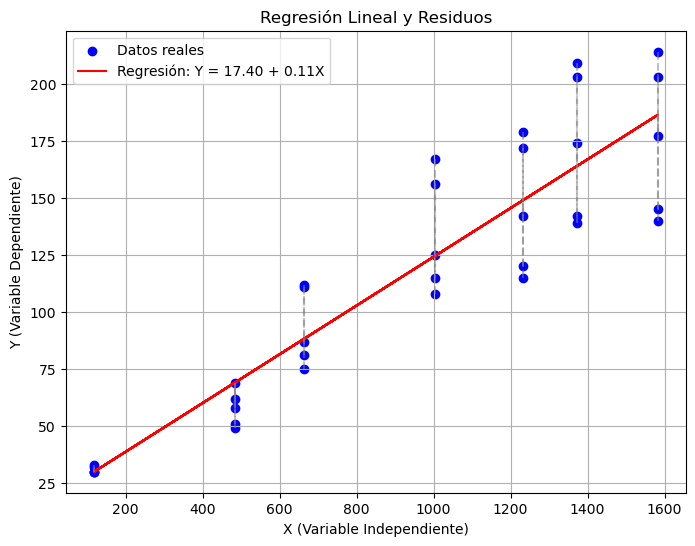

In [36]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Datos
X = np.array(x_datos).reshape(-1, 1)
Y = np.array(y_datos)

# Entrenar modelo
model = LinearRegression()
model.fit(X, Y)

# Predicciones y errores
Y_pred = model.predict(X)
residuos = Y - Y_pred  #  (residuos)

# Métricas
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Coeficientes
print(f"Intercepto (β0): {model.intercept_:.2f}")
print(f"Coeficiente (β1): {model.coef_[0]:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X')
plt.xlabel('X (Variable Independiente)')
plt.ylabel('Y (Variable Dependiente)')
plt.title('Regresión Lineal y Residuos')
plt.legend()

# Mostrar residuos como líneas verticales
for xi, yi, yp in zip(X, Y, Y_pred):
    plt.plot([xi, xi], [yi, yp], color='gray', linestyle='--', alpha=0.5)

plt.grid(True)
plt.show()



In [37]:
predecir = np.array([80]).reshape(-1, 1)  # Cambia el valor según lo que quieras predecir
prediccion = model.predict(predecir)
print(f"Predicción para X=80: Y={prediccion[0]:.2f}")


Predicción para X=80: Y=25.94


###  Interpretación de los parámetros del modelo

- **Intercepto (β₀):** Es el valor estimado de la variable dependiente cuando el predictor (x) es cero. Representa el punto donde la recta de regresión corta el eje y.

- **Coeficiente (β₁):** Mide el cambio esperado en y por cada unidad que aumenta x. Si es positivo, la relación es directa; si es negativo, es inversa.

- **MSE (Error cuadrático medio):** Es el promedio del cuadrado de los errores de predicción. Cuanto menor sea, mejor es el ajuste del modelo.

- **R² (Coeficiente de determinación):** Indica qué proporción de la variabilidad de y es explicada por el modelo. Varía entre 0 y 1; mientras más cerca de 1, mejor se ajusta el modelo a los datos.


Residuos:

In [38]:
# Tabla de errores (residuos)
tabla_errores = pd.DataFrame({
    'X': X.flatten(),
    'Y Real': Y,
    'Y Predicho': Y_pred,
    'Error (Residuo)': residuos,
    'Error Cuadrático': residuos**2
})   

print("\nTabla de Errores:")
print(tabla_errores)


Tabla de Errores:
       X  Y Real  Y Predicho  Error (Residuo)  Error Cuadrático
0    118      30   29.998549         0.001451          0.000002
1    484      58   69.076488       -11.076488        122.688577
2    664      87   88.295146        -1.295146          1.677403
3   1004     115  124.597057        -9.597057         92.103496
4   1231     120  148.833920       -28.833920        831.394966
5   1372     142  163.888536       -21.888536        479.108018
6   1582     145  186.310304       -41.310304       1706.541258
7    118      33   29.998549         3.001451          9.008711
8    484      69   69.076488        -0.076488          0.005850
9    664     111   88.295146        22.704854        515.510391
10  1004     156  124.597057        31.402943        986.144854
11  1231     172  148.833920        23.166080        536.667244
12  1372     203  163.888536        39.111464       1529.706598
13  1582     203  186.310304        16.689696        278.545936
14   118      30   29

<Figure size 1000x600 with 0 Axes>

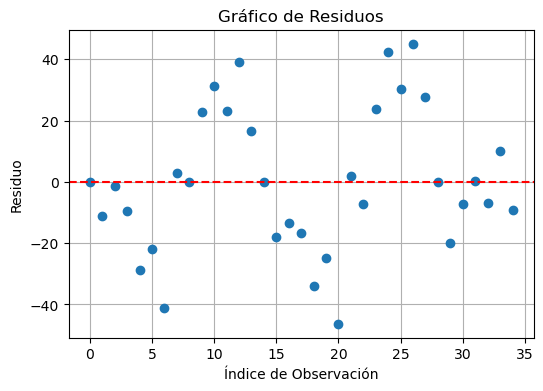

In [39]:
#grafico de los residuos
plt.figure(figsize=(10, 6))
plt.figure(figsize=(6, 4))
plt.plot(residuos, marker='o', linestyle='None')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Índice de Observación')
plt.ylabel('Residuo')
plt.grid(True)
plt.show()


Resumen de la regresión:

In [40]:

import statsmodels.api as sm
X_sm = sm.add_constant(X)  
modelo_sm = sm.OLS(Y, X_sm).fit()

# Summary 
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.4
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           1.93e-14
Time:                        11:11:32   Log-Likelihood:                -159.48
No. Observations:                  35   AIC:                             323.0
Df Residuals:                      33   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3997      8.623      2.018      0.0

"""
### Interpretación completa del modelo de regresión OLS

| Indicador                             | Interpretación                                                                      |
|-------------------------------------- |-------------------------------------------------------------------------------------|
| Variable dependiente: y               | Es la variable que se desea explicar o predecir.                                    |
| Modelo: OLS**                         | Se utilizó el método de Mínimos Cuadrados Ordinarios.                               |
| Método: Least Squares                 | Ajuste que minimiza la suma de los errores cuadrados.                               |
| N° de observaciones: 35               | Se usaron 35 datos para estimar el modelo.                                          |
| Grados de libertad del modelo: 1      | El modelo tiene 1 predictor (x1).                                                   |
| Grados de libertad residual: 33       | Corresponde a los errores: $df_{res} = n - k - 1$.                                  |
| R-cuadrado = 0.835                    | El modelo explica el 83.5% de la variación de la variable dependiente.              |
| R-cuadrado ajustado = 0.830           | Corrige el R² por el número de predictores. Muy alto también.                       |
| Estadístico F = 166.4                 | Mide la significancia global del modelo.                                            |
| p-valor de F = 1.93e-14               | Se rechaza $H_0$: el modelo tiene al menos un predictor significativo.              |
| Log-Likelihood = -159.48              | Indicador de bondad del ajuste: más alto es mejor.                                  |
| AIC = 323.0**                         | Criterio de Akaike: sirve para comparar modelos (más bajo es mejor).                |
| BIC = 326.1**                         | Criterio Bayesiano: penaliza modelos más complejos.                                 |
| Coef. constante = 17.3997             | Valor de $y$ cuando $x_1 = 0$. Casi significativo con $p = 0.052$.                  |
| Coef. x1 = 0.1068                     | Por cada unidad adicional en $x_1$, $y$ aumenta 0.1068 en promedio.                 |
| Error estándar de x1 = 0.008          | Precisión del estimador: cuanto menor, mejor.                                       |
| Estadístico t de x1 = 12.9            | Muy alto: gran evidencia contra $H_0$.                                              |
| p-valor de x1 = 0.000                 | El coeficiente es altamente significativo.                                          |
| IC 95% de x1: [0.090, 0.124]          | Con 95% de confianza, el coeficiente de $x_1$ se encuentra en ese intervalo.        |
| Durbin-Watson = 0.670                 | Indica autocorrelación positiva en los residuos (valores cercanos a 0).             |
| Omnibus = 0.59                        | Test de normalidad de los residuos.                                                 |
| Prob(Omnibus) = 0.745                 | p-alto: no se rechaza la normalidad.                                                |
| Jarque-Bera = 0.688                   | Otro test de normalidad (más robusto).                                              |
| Prob(JB) = 0.709                      | p-alto: residuos son normales.                                                      |
| Asimetría (Skew) = 0.157              | Distribución de errores simétrica.                                                  |
| Curtosis = 2.389                      | Cercana a la normal (k = 3).                                                        |
| Cond. number = 2.24e+03               | Alto: puede haber colinealidad si hay más variables.                                |


"""

Verificar los supuestos:

1.Normalidad (shapirto-test)

In [41]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos)
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Los residuos siguen una distribución normal (p > 0.05)")
else:
    print("Los residuos no siguen una distribución normal (p <= 0.05)")
    


Shapiro-Wilk Test: Statistic=0.9729, p-value=0.5273
Los residuos siguen una distribución normal (p > 0.05)


2.Igualdad de varianzas o homocedasticidad

In [42]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_with_const = sm.add_constant(x_datos)
bp_test = het_breuschpagan(residuos, X_with_const)
print(f"\nBreusch-Pagan Test: LM Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Hay evidencia estadística par afirmar que hay homocedasticidad (p > 0.05)")
else:
    print("Hay evidencia de heterocedasticidad (p <= 0.05)")
    


Breusch-Pagan Test: LM Statistic=11.2282, p-value=0.0008
Hay evidencia de heterocedasticidad (p <= 0.05)


3.Indepencia (Durbin-wantson)

In [43]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuos)
print(f"- Durbin-Watson: {dw:.4f}")

print("\nInterpretación del estadístico Durbin-Watson:")
if dw < 1.5:
    print("-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)")
elif dw > 2.5:
    print("-> Posible autocorrelación NEGATIVA en los residuos (valor > 2.5)")
else:
    print("-> No hay evidencia de autocorrelación (valor cercano a 2)")
    
    
# Si el valor de Durbin-Watson está entre 1.5 y 2.5, se considera que no hay evidencia de autocorrelación en los residuos.
#se afirma la independencia de los residuos.

- Durbin-Watson: 0.6695

Interpretación del estadístico Durbin-Watson:
-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)


4.Coeficiente de correlacion  de Pearson

In [44]:
correlacion = df['x_datos'].corr(df['y_datos'])
print(f"Coeficiente de correlación: {correlacion:.4f}")

Coeficiente de correlación: 0.9135


5.Coeficiente de determinación

In [45]:
R2= correlacion**2
print(f"R²: {R2:.4f}")

R²: 0.8345


| Valor de \(R^2\) | Interpretación |
|------------------|----------------|
| \(R^2 = 0\)      | El modelo **no explica** nada de la variación en \(y\) |
| \(0 < R^2 < 1\)  | El modelo explica **una parte** de la variación en \(y\) |
| \(R^2 = 1\)      | El modelo explica **el 100%** de la variación en \(y\) |
| *Ejemplo*: \(R^2 = 0.78\) | **El 78%** de la variación en \(y\) es explicada por \(x\) |

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

# Usando fórmula (similar a R)
modelo_ols = ols('y_datos~ x_datos', data=df).fit()
print(sm.stats.anova_lm(modelo_ols))

            df        sum_sq       mean_sq           F        PR(>F)
x_datos    1.0  93771.541337  93771.541337  166.415886  1.930596e-14
Residual  33.0  18594.744377    563.477102         NaN           NaN


Interpretación de la Tabla ANOVA en Regresión Lineal:

$$
\begin{array}{|l|l|}
\hline
\textbf{Elemento} & \textbf{Interpretación} \\
\hline
\text{Hipótesis } H_0 & \beta_1 = 0 \ (\text{no hay relación lineal}) \\
\hline
\text{Hipótesis } H_1 & \beta_1 \ne 0 \ (\text{existe relación lineal}) \\
\hline
\text{Estadístico } F & \dfrac{\text{CM}_{\text{Reg}}}{\text{CM}_{\text{Res}}} \ (\text{compara variabilidad explicada vs. error}) \\
\hline
\text{p-valor} & p < 0.05 \Rightarrow \text{modelo significativo} \\
\hline
\text{Suma de cuadrados (SC)} & 
\begin{array}{l}
\text{SC}_{\text{Reg}}: \text{variación explicada} \\
\text{SC}_{\text{Res}}: \text{variación no explicada (error)} \\
\text{SC}_{\text{Tot}}: \text{variación total}
\end{array} \\
\hline
\text{Coeficiente } R^2 & \dfrac{\text{SC}_{\text{Reg}}}{\text{SC}_{\text{Tot}}} \Rightarrow \text{porcentaje explicado por el modelo} \\
\hline
\end{array}
$$
